In [6]:
import osmnx as ox
import geopandas as gpd

In [41]:
# Setting the data path
data_path = r'YOUR FILE PATH'

## 1. Defining a search area

In [37]:
search_area = "OH, USA"
area = ox.geocode_to_gdf(search_area)

<AxesSubplot:>

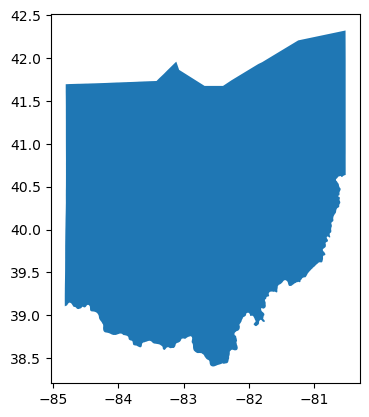

In [38]:
area.plot()

## 2. Searching for Dollar General locations within the search area

In [39]:
tags = {'brand':'Dollar General'} 
buildings = ox.geometries_from_place(search_area, tags)
buildings.head()

brand brand:wikidata    brand:wikipedia  \
element_type osmid                                                          
node         8155671002  Dollar General        Q145168  en:Dollar General   
             9664519146  Dollar General        Q145168  en:Dollar General   
way          769785598   Dollar General        Q145168  en:Dollar General   
             921158812   Dollar General        Q145168  en:Dollar General   
node         9664700047  Dollar General        Q145168  en:Dollar General   

                                   name           shop  \
element_type osmid                                       
node         8155671002  Dollar General  variety_store   
             9664519146  Dollar General  variety_store   
way          769785598   Dollar General  variety_store   
             921158812   Dollar General  variety_store   
node         9664700047  Dollar General  variety_store   

                                                                  geometry  \
element_type osmid                                                           
node         8155671002                         POINT (-82.45860 38.42858)   
             9664519146                         POINT (-82.37589 38.43839)   
way          769785598   POLYGON ((-82.36632 38.44060, -82.36608 38.440...   
             921158812   POLYGON ((-82.28537 38.58989, -82.28536 38.590...   
node         9664700047                         POINT (-82.63385 39.04780)   

                            addr:city addr:housenumber addr:postcode  \
element_type osmid                                                     
node         8155671002           NaN              NaN           NaN   
             9664519146  Proctorville              510         45669   
way          769785598            NaN              NaN           NaN   
             921158812            NaN              NaN           NaN   
node         9664700047       Jackson              325         45640   

                        addr:state  ... payment:cash payment:credit_cards  \
element_type osmid                  ...                                     
node         8155671002        NaN  ...          NaN                  NaN   
             9664519146         OH  ...          NaN                  NaN   
way          769785598         NaN  ...          NaN                  NaN   
             921158812         NaN  ...          NaN                  NaN   
node         9664700047         OH  ...          NaN                  NaN   

                        alt_name payment:american_express payment:cheque  \
element_type osmid                                                         
node         8155671002      NaN                      NaN            NaN   
             9664519146      NaN                      NaN            NaN   
way          769785598       NaN                      NaN            NaN   
             921158812       NaN                      NaN            NaN   
node         9664700047      NaN                      NaN            NaN   

                        payment:debit_cards payment:food_stamps  \
element_type osmid                                                
node         8155671002                 NaN                 NaN   
             9664519146                 NaN                 NaN   
way          769785598                  NaN                 NaN   
             921158812                  NaN                 NaN   
node         9664700047                 NaN                 NaN   

                        payment:mastercard payment:visa payment:visa_debit  
element_type osmid                                                          
node         8155671002                NaN          NaN                NaN  
             9664519146                NaN          NaN                NaN  
way          769785598                 NaN          NaN                NaN  
             921158812                 NaN          NaN                NaN  
node         9664700047       

In [42]:
DG_points = buildings[buildings.geom_type == 'Point']
DG_points['X'] = DG_points.geometry.x
DG_points['Y'] = DG_points.geometry.y
DG_points.head(10)

C:\Users\imdav\Anaconda3\envs\GeospatialPython\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\imdav\Anaconda3\envs\GeospatialPython\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


brand brand:wikidata    brand:wikipedia  \
element_type osmid                                                          
node         8155671002  Dollar General        Q145168  en:Dollar General   
             9664519146  Dollar General        Q145168  en:Dollar General   
             9664700047  Dollar General        Q145168  en:Dollar General   
             9699400098  Dollar General        Q145168  en:Dollar General   
             5610584322  Dollar General        Q145168  en:Dollar General   
             6541995221  Dollar General        Q145168  en:Dollar General   
             8423631416  Dollar General        Q145168  en:Dollar General   
             4016548521  Dollar General        Q145168  en:Dollar General   
             9140123128  Dollar General        Q145168  en:Dollar General   
             9738827142  Dollar General        Q145168                NaN   

                                   name           shop  \
element_type osmid                                       
node         8155671002  Dollar General  variety_store   
             9664519146  Dollar General  variety_store   
             9664700047  Dollar General  variety_store   
             9699400098  Dollar General  variety_store   
             5610584322  Dollar General  variety_store   
             6541995221  Dollar General  variety_store   
             8423631416  Dollar General  variety_store   
             4016548521  Dollar General  variety_store   
             9140123128  Dollar General  variety_store   
             9738827142  Dollar General  variety_store   

                                           geometry     addr:city  \
element_type osmid                                                  
node         8155671002  POINT (-82.45860 38.42858)           NaN   
             9664519146  POINT (-82.37589 38.43839)  Proctorville   
             9664700047  POINT (-82.63385 39.04780)       Jackson   
             9699400098  POINT (-82.44356 40.03412)         Heath   
             5610584322  POINT (-82.33207 40.85606)           NaN   
             6541995221  POINT (-82.54241 40.72486)     Mansfield   
             8423631416  POINT (-82.17904 41.46652)           NaN   
             4016548521  POINT (-81.80301 41.48486)           NaN   
             9140123128  POINT (-81.73789 41.46133)           NaN   
             9738827142  POINT (-81.64130 41.46174)           NaN   

                        addr:housenumber addr:postcode addr:state  ...  \
element_type osmid                                                 ...   
node         8155671002              NaN           NaN        NaN  ...   
             9664519146              510         45669         OH  ...   
             9664700047              325         45640         OH  ...   
             9699400098              639         43056         OH  ...   
             5610584322             1289           NaN        NaN  ...   
             6541995221             1280         44907         OH  ...   
             8423631416              425           NaN        NaN  ...   
             4016548521              NaN           NaN        NaN  ...   
             9140123128              NaN           NaN        NaN  ...   
             9738827142              NaN           NaN        NaN  ...   

                        alt_name payment:american_express payment:cheque  \
element_type osmid                                                         
node         8155671002      NaN                      NaN            NaN   
             9664519146      NaN                      NaN            NaN   
             9664700047      NaN                      NaN            NaN   
             9699400098      NaN                      NaN            NaN   
             5610584322      NaN                      NaN            NaN   
             6541995221      NaN                      NaN            NaN   
             8423631416      NaN                      NaN            NaN   
          

## 3. Searching for Family Dollar locations within the search area

In [43]:
tags = {'brand':'Family Dollar'} 
buildings = ox.geometries_from_place(search_area, tags)
buildings.head()

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                    
node         9622630880   Coal Grove              324         45638   
             9630540643  South Point              301         45680   
way          609808811           NaN              NaN           NaN   
             632676051   South Point              385         45680   
             769785597           NaN              NaN           NaN   

                        addr:state      addr:street          brand  \
element_type osmid                                                   
node         9622630880         OH      Marion Pike  Family Dollar   
             9630540643         OH      Solida Road  Family Dollar   
way          609808811         NaN              NaN  Family Dollar   
             632676051          OH  County Road 406  Family Dollar   
             769785597         NaN              NaN  Family Dollar   

                        brand:wikidata   brand:wikipedia           name  \
element_type osmid                                                        
node         9622630880       Q5433101  en:Family Dollar  Family Dollar   
             9630540643       Q5433101  en:Family Dollar  Family Dollar   
way          609808811        Q5433101  en:Family Dollar  Family Dollar   
             632676051        Q5433101  en:Family Dollar  Family Dollar   
             769785597        Q5433101  en:Family Dollar  Family Dollar   

                           ref  ... drive_through wheelchair source operator  \
element_type osmid              ...                                            
node         9622630880   6025  ...           NaN        NaN    NaN      NaN   
             9630540643   1640  ...           NaN        NaN    NaN      NaN   
way          609808811     NaN  ...           NaN        NaN    NaN      NaN   
             632676051   10690  ...           NaN        NaN    NaN      NaN   
             769785597     NaN  ...           NaN        NaN    NaN      NaN   

                        name:en ref:family_dollar advertising area  \
element_type osmid                                                   
node         9622630880     NaN               NaN         NaN  NaN   
             9630540643     NaN               NaN         NaN  NaN   
way          609808811      NaN               NaN         NaN  NaN   
             632676051      NaN               NaN         NaN  NaN   
             769785597      NaN               NaN         NaN  NaN   

                        building:colour branch  
element_type osmid                              
node         9622630880             NaN    NaN  
             9630540643             NaN    NaN  
way          609808811              NaN    NaN  
             632676051              NaN    NaN  
             769785597              NaN    NaN  

[5 rows x 34 columns]

In [44]:
FD_points = buildings[buildings.geom_type == 'Point']
FD_points['X'] = FD_points.geometry.x
FD_points['Y'] = FD_points.geometry.y
FD_points.head(10)

C:\Users\imdav\Anaconda3\envs\GeospatialPython\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\imdav\Anaconda3\envs\GeospatialPython\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


addr:city addr:housenumber addr:postcode  \
element_type osmid                                                    
node         9622630880   Coal Grove              324         45638   
             9630540643  South Point              301         45680   
             7006732723          NaN              NaN           NaN   
             6384997692    Mansfield             1219         44905   
             6515261461          NaN              NaN           NaN   
             4381516776     Sandusky              709         44870   
             8914211772     Sandusky             1112         44870   
             2687482976          NaN              NaN           NaN   
             3857294802          NaN              NaN           NaN   
             3992210600          NaN              NaN           NaN   

                        addr:state          addr:street          brand  \
element_type osmid                                                       
node         9622630880         OH          Marion Pike  Family Dollar   
             9630540643         OH          Solida Road  Family Dollar   
             7006732723        NaN                  NaN  Family Dollar   
             6384997692         OH         Ashland Road  Family Dollar   
             6515261461        NaN                  NaN  Family Dollar   
             4381516776         OH  West Perkins Avenue  Family Dollar   
             8914211772         OH  Cleveland Road West  Family Dollar   
             2687482976        NaN                  NaN  Family Dollar   
             3857294802        NaN                  NaN  Family Dollar   
             3992210600        NaN                  NaN  Family Dollar   

                        brand:wikidata   brand:wikipedia           name   ref  \
element_type osmid                                                              
node         9622630880       Q5433101  en:Family Dollar  Family Dollar  6025   
             9630540643       Q5433101  en:Family Dollar  Family Dollar  1640   
             7006732723       Q5433101  en:Family Dollar  Family Dollar   NaN   
             6384997692       Q5433101  en:Family Dollar  Family Dollar   NaN   
             6515261461       Q5433101  en:Family Dollar  Family Dollar   NaN   
             4381516776       Q5433101  en:Family Dollar  Family Dollar  7280   
             8914211772       Q5433101  en:Family Dollar  Family Dollar   NaN   
             2687482976       Q5433101  en:Family Dollar  Family Dollar   NaN   
             3857294802       Q5433101  en:Family Dollar  Family Dollar   NaN   
             3992210600       Q5433101  en:Family Dollar  Family Dollar   NaN   

                         ... source operator name:en ref:family_dollar  \
element_type osmid       ...                                             
node         9622630880  ...    NaN      NaN     NaN               NaN   
             9630540643  ...    NaN      NaN     NaN               NaN   
             7006732723  ...    NaN      NaN     NaN               NaN   
             6384997692  ...    NaN      NaN     NaN               NaN   
             6515261461  ...    NaN      NaN     NaN               NaN   
             4381516776  ...    NaN      NaN     NaN               NaN   
             8914211772  ...    NaN      NaN     NaN               NaN   
             2687482976  ...    NaN      NaN     NaN               NaN   
             3857294802  ...    NaN      NaN     NaN               NaN   
             3992210600  ...    NaN      NaN     NaN               NaN   

                        advertising area building:colour branch          X  \
element_type osmid                                                           
node         9622630880         NaN  NaN             NaN    NaN -82.648173   
             9630540643         NaN  NaN             NaN    NaN -82.583572   
             7006732723         NaN  NaN             NaN    NaN -82.416731   
             6384997692         N

## 4. Writing out the data

In [46]:
DG_points.to_csv(data_path + 'OSM_DollarGeneralLocs.csv')
FD_points.to_csv(data_path + 'OSM_FamilyDollarLocs.csv')